# PyTorch Workflow:
  
1. Data (prepare and load)
2. Build Model
3. Fitting the model to data (training)
4. Making predictions and evaluting a model (inference)
5. Saving and loading a model
6. Putting it all together

In [ ]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

## 1. Data (preparing and loading)  
  
Data can be almost anything in machine learning.

* Excel spreadsheet
* Images of any kind
* Videos
* Audio
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.  

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with known **parameters**.

### Formula: Y = a + bX

In [ ]:
# Create known parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # We need the extra dimension later on for when we are doing models
y = weight * X + bias # This is the linear regression formula

# Lets view these numbers:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

So we want to build a model to look at the values of X and predict the corresponding y values.

In [ ]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets
##### **One of the most important concepts in machine learning!**  
  
The goal is generalization.  
**Generalization** - the ability for a machine learning model to perform well on data it has not seen before  
  
Split Data into 3 sets:
* Training Set - model learns from this data : 60-80%
* Validation Set - model gets tuned to this data : 10-20%
* Testing set - model gets evaluated on this data : 10-20%

In [ ]:
# Lets create a training and testing set with our data. (80/20 Split)

# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split] # Training Sets
X_test, y_test = X[train_split:], y[train_split:] # Testing Sets

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data, and compares predictions
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data") # Adding labels for the legend

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

  # Are there predictions?
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  """
  Remember, the goal is for the predictions to be as similar to test_labels
  (or the testing data) as possible, as we are trying to predict y.
  """

  plt.legend(prop={"size": 14})

  plt.show()

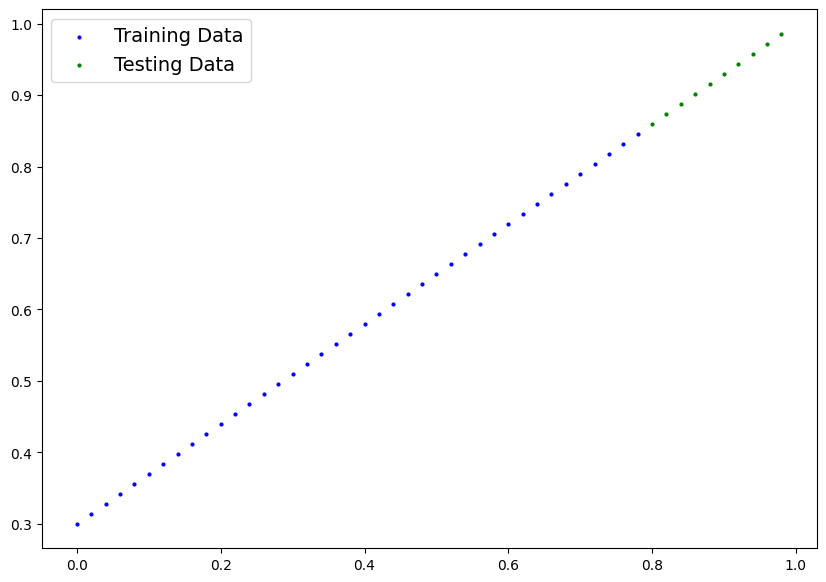

In [ ]:
plot_predictions()

### 2. Build Model  
  
The first PyTorch model...  
  
What the model does:
* Start w/ random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)  
  
How does it do so?  
  
Through two main algorithms:  
1. Gradient descent
2. Backpropagation

In [ ]:

# Create linear regression model class
class LinearRegressionModel(nn.Module): # <-- almost everything in PyTorch inherits from nn.Module
  def __init__(self): # <-- Constructor
    super().__init__() # basically saying run the constructor of the parent class `nn.Module`
    self.weights = nn.Parameter(torch.randn(1, # start w/ a random weight and try to adjust it to the ideal weight
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, # start w/ a random bias and try to adjust it to the ideal bias
                                         requires_grad=True,
                                         dtype=torch.float))

  # Forward method to define the computation in the model (if you inherit from nn.Module, you need a forward method)
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <-- "x" is the input data
    return self.weights * x + self.bias # <-- The linear regression formula!

So the goal of the model is to start w/ random numbers (this is why we do torch.randn()..) then look at the data (training samples) and update those random numbers to represent the pattern in the data.

### PyTorch model building essentials

* torch.nn - contains all of the building blocks for computational graphs (a neural network can be considered a computational graph)
* torch.nn.parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - the base class for all neural network modules. If you subclass it, you should overright forward.
* torch.optim - this is where the optimizers in PyTorch live, they will help w/ gradient descent
* def forward() - All nn.Module subclasses require you to overright foward(). This method defines what happens in the forward computation.


### Checking the contents of our PyTorch model  
  
What is inside the model?  

We can check out the model parameters or what's inside the model by using `parameters()`

In [ ]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inference_mode()`  
  
To check the mode's predictive power, lets see how well it predicts `y_test` based on `X_test`.

When data is passed through the model, it is going to run it through the `forward()` method.

In [ ]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [ ]:
# Make predictions w/ model
with torch.inference_mode(): # When making predictions, use `torch.inference_mode()`
  y_preds = model_0(X_test)

# `interence_mode()` improves preformance for predictions

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

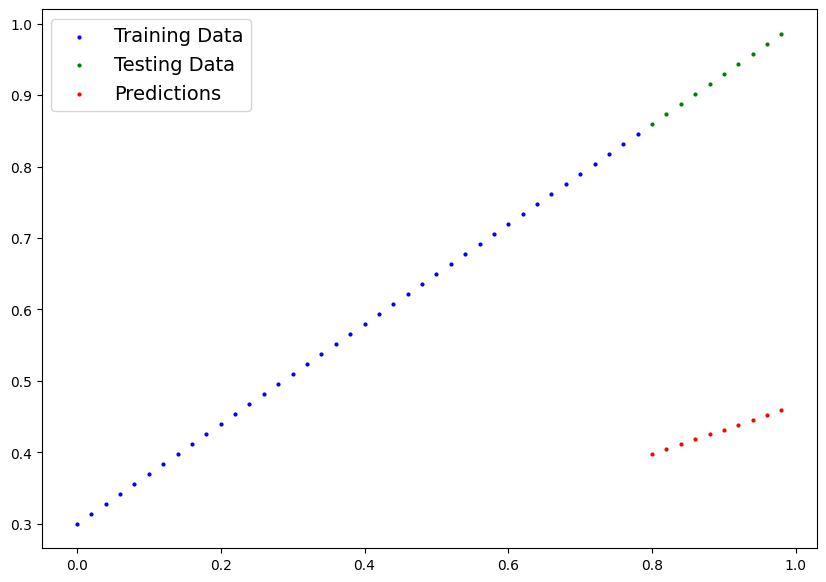

In [ ]:
plot_predictions(predictions=y_preds)

## 3. Train Model  
  
The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.  
  
Or in other words from a poor representation of the data to a better representation of the data.  
  
One way to measure how poor or how wrong a models predictions are is to use a loss function.  
  
* Note: Loss function may also be called cost function or criterion in different areas.  

Things we need to train
  
* **Loss function** - a function to measure how wrong your model's predictions are to the ideal outputs, lower is better.  
* **Optimizer** - takes into account the loss of the model and adjusts the model's parameters (e.g. weight & bias in this case) to improve the loss function  
  
And specifically for PyTorch, we need:
* A training loop
* A testing loop

#### **L1 Loss Function** (also called MAE, mean absolute error)
Calculates the difference between each prediction point and the target values, adds them all up, and gets the average.
  
Difference = y_prediction - y_test  
then taking the average of all prediction points.

In [ ]:
# Check out the model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr = learning rate = possibly the most important hyperparameter you can set

Inside the optimizer you set two parameters:
* `params` - the model parameters you'd like to optimize
* `lr` (learning rate) - controls how big of a step the optimizer takes when updating the model's weights.

### Building a training loop (and a testing loop) in PyTorch  
  
A couple of things needed in a training loop:  
0. Loop through the data
1. Forward pass (this involves data moving through the model's `forward()` functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)  
3. Optimizer zero grad - resets the optimizer step to count from 0, otherwise it will keep accumlating
4. Loss backwards - move backwards through the network to calculate the gradients of each of the parameters of the model w/ respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust the model's parameters to try and improve the loss (**gradient descent**)

In [ ]:
torch.manual_seed(42)
# An epoch is one loop through the data... (this is a hyperparameter because it is set by the coder)
epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

  # 1. Forward Pass
  y_pred = model_0(X_train) # calling the forward method looks different than normal OOP in PyTorch

  # 2. Calculate the Loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss w/ respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will acculumate through the loop so... we have to zero them above in step 3 for the next iteration of the loop


  ### Testing
  model_0.eval() # evaluation mode, turns off different settings in the model not needed for evaluation/testing
  with torch.inference_mode(): # turns off gradient tracking & more behind the scenes
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

    print(f"Epoch: {epoch} | Test: {loss} | Test loss: {test_loss}")
    # Print out model state_dict()
    print(model_0.state_dict())

Epoch: 0 | Test: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Test: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Test: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Test: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Test: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Test: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Test: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

In [ ]:
# In order for values to be plotted, they must be in numPy array form.
import numpy as np
np.array(torch.tensor(loss_values).numpy())

array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
       0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
       0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
       0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
      dtype=float32)

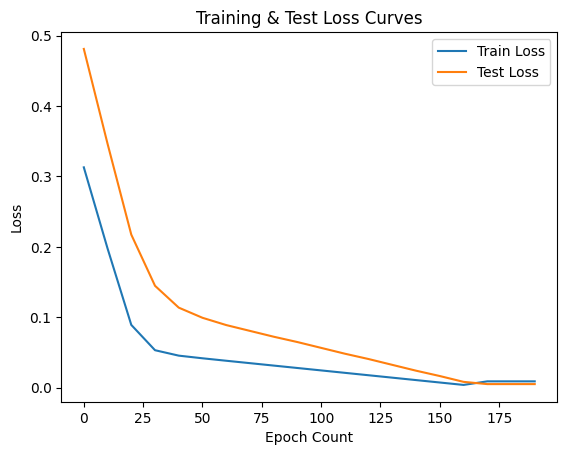

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Training & Test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epoch Count")
plt.legend()
plt.show()

In [ ]:
model_0.state_dict() # Parameters

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
weight, bias # Ideal Parameters

(0.7, 0.3)

In [ ]:
# Lets make predictions with this newly trained model
with torch.inference_mode():
  y_preds_new = model_0(X_test)

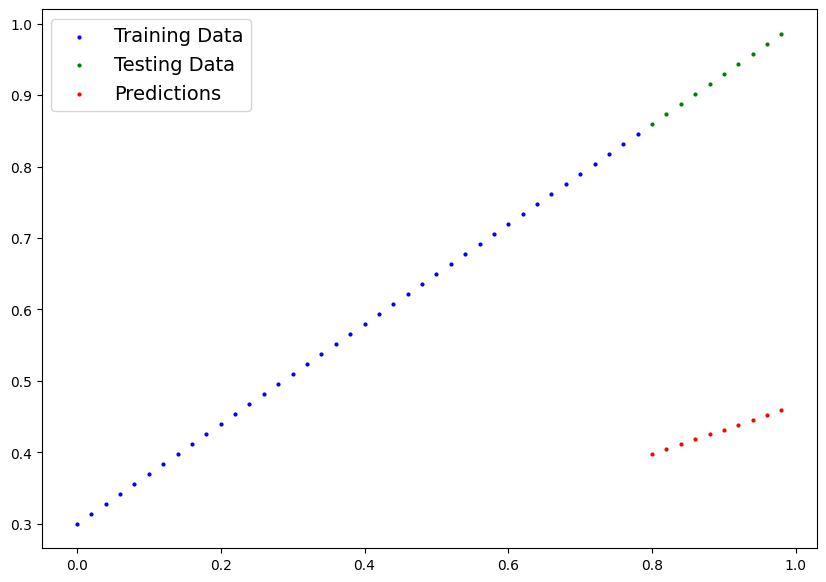

In [ ]:
# Old Predictions:
plot_predictions(predictions=y_preds)

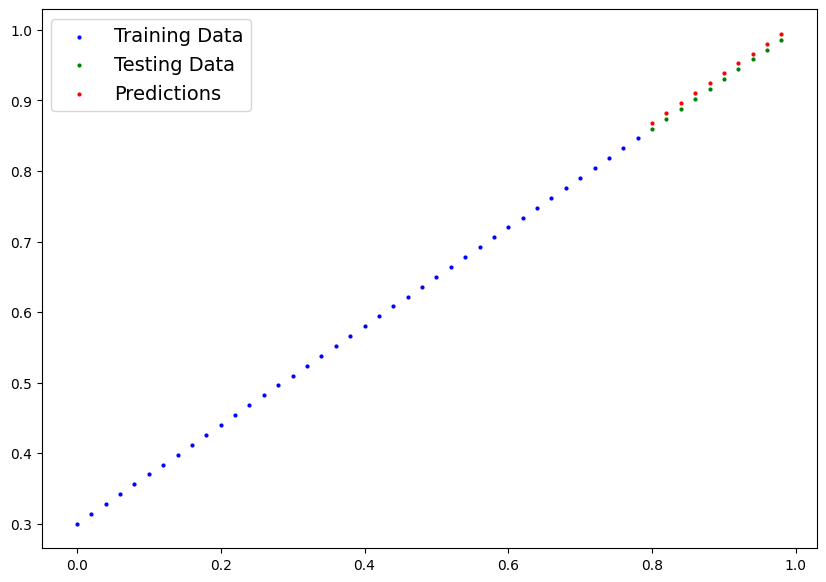

In [ ]:
# New Predictions!
plot_predictions(predictions=y_preds_new)

## Saving a Model in PyTorch  
  
There are three main methods for saving and loading models in PyTorch.  
  
1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - allows you to load a model's saved state dictionary

In [ ]:
# Saving PyTorch model
from pathlib import Path

# 1. Create model's directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_model_0.pth


In [ ]:
!ls -1 models

01_pytorch_model_0.pth


## Loading a PyTorch model  
  
Since the model's `state_dict()` was saved rather than the entire model, we'll create a new instance of the model class and load the saved `state_dict()` into that.

In [ ]:
# Loading a `state_dict()`

# Creating a new instance of the model
loaded_model_0 = LinearRegressionModel()

# Loading the saved `state_dict()` into the new instance
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH, weights_only=True)) # load the saved weights

# Lets see the weights now
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# make some predictions with the loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# Compare loaded model preds w/ original model preds
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

In [1]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Setup Device Agnostic Code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


### 6.1 Data:

In [3]:
# Getting Data
weights = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weights * X + bias

In [4]:
train_data_split = int(0.8 * len(X))
X_train, y_train = X[:train_data_split], y[:train_data_split]
X_test, y_test = X[train_data_split:], y[train_data_split:]

### 6.2 Creating Model

In [5]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    # Use nn.Linear() for creating the model parameters / also called: linear transform, probing layer, fully connected layer, dense layer
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x):
    return self.linear_layer(x)

In [6]:
# Setting random seed and creating model instance
torch.manual_seed(42)

model_0_practice = LinearRegressionModelV2()

In [7]:
# Check the model current device
next(model_0_practice.parameters()).device

device(type='cpu')

In [8]:
# Set the model to use the target device
model_0_practice.to(device)
next(model_0_practice.parameters()).device

device(type='cuda', index=0)

In [20]:
# Move data to target device (device agnostic code for data)
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

In [10]:
# Creating loss function and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_0_practice.parameters(),
                            lr=0.01)

### 6.3 Training and Testing Model

In [11]:
torch.manual_seed(42)

epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

### Training Model
for epoch in range(epochs):
  model_0_practice.train()

  # 1. Forward pass
  y_preds = model_0_practice(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_preds, y_train)

  # 3. Optimzier zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_0_practice.eval()
  with torch.inference_mode():
    test_preds = model_0_practice(X_test)
    test_loss = loss_fn(test_preds, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

    print(f"Epoch: {epoch} | Test: {loss} | Test loss: {test_loss}")
    print(model_0_practice.state_dict())

Epoch: 0 | Test: 0.5551779866218567 | Test loss: 0.5739762187004089
OrderedDict([('linear_layer.weight', tensor([[0.7606]], device='cuda:0')), ('linear_layer.bias', tensor([0.8200], device='cuda:0'))])
Epoch: 10 | Test: 0.439968079328537 | Test loss: 0.4392664134502411
OrderedDict([('linear_layer.weight', tensor([[0.7216]], device='cuda:0')), ('linear_layer.bias', tensor([0.7200], device='cuda:0'))])
Epoch: 20 | Test: 0.3247582018375397 | Test loss: 0.30455657839775085
OrderedDict([('linear_layer.weight', tensor([[0.6826]], device='cuda:0')), ('linear_layer.bias', tensor([0.6200], device='cuda:0'))])
Epoch: 30 | Test: 0.20954833924770355 | Test loss: 0.16984669864177704
OrderedDict([('linear_layer.weight', tensor([[0.6436]], device='cuda:0')), ('linear_layer.bias', tensor([0.5200], device='cuda:0'))])
Epoch: 40 | Test: 0.09433845430612564 | Test loss: 0.03513690456748009
OrderedDict([('linear_layer.weight', tensor([[0.6046]], device='cuda:0')), ('linear_layer.bias', tensor([0.4200], de

### 6.4 Plotting and Evaluating Predictions

In [12]:
# Turn model into evaluation mode
model_0_practice.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_final_prediction = model_0_practice(X_test)
y_final_prediction

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

In [13]:
# Adjusting the plot_predictions function to convert tensors to cpu device and numpy format
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data, and compares predictions.
  Automatically moves all data to CPU and NumPy.
  """
  # Ensure all tensors are on CPU and converted to NumPy
  train_data = train_data.detach().cpu().numpy()
  train_labels = train_labels.detach().cpu().numpy()
  test_data = test_data.detach().cpu().numpy()
  test_labels = test_labels.detach().cpu().numpy()

  if predictions is not None and torch.is_tensor(predictions):
    predictions = predictions.detach().cpu().numpy()

  # Begin plotting
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14})
  plt.show()


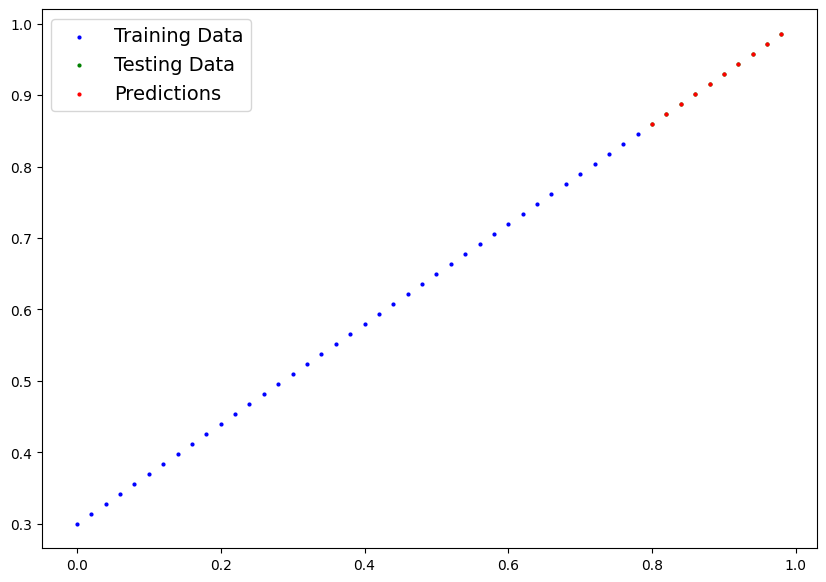

In [14]:
import numpy as np
# Check out the model predictions visually
plot_predictions(predictions=y_final_prediction.cpu().numpy()) # gotta convert the tensor back to cpu device because matplotlib is numpy based and numpy uses CPU!

### 6.5 Saving and Loading a Trained Model

In [15]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_model_0_practice.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0_practice.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_model_0_practice.pth


In [17]:
# Load a PyTorch Model

# Create new instance of linear regression model v2
load_model_0_practice = LinearRegressionModelV2()

# Load saved weights onto the new instance
load_model_0_practice.load_state_dict(torch.load(MODEL_SAVE_PATH, weights_only=True))

# Checking the `state_dict()`
load_model_0_practice.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [24]:
# Making sure it is on the GPU device
load_model_0_practice.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [26]:
# Evalaute loaded model
load_model_0_practice.eval()

with torch.inference_mode():
  load_model_0_preds = load_model_0_practice(X_test)
y_final_prediction == load_model_0_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')